In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("insurance.csv")

In [3]:
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 

df['sex']= label_encoder.fit_transform(df['sex']) 
df['smoker']= label_encoder.fit_transform(df['smoker'])

In [9]:
df['region']= label_encoder.fit_transform(df['region']) 

In [10]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [11]:
from sklearn.model_selection import train_test_split
x = df.drop(['charges'], axis = 1)
y = df['charges']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


models = {     
    "LR": LinearRegression(),
    "RF": RandomForestRegressor(n_estimators=100, max_depth=7),
    "DT": DecisionTreeRegressor(),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, max_depth=7),
    "KNN": KNeighborsRegressor(),
    "SVR": SVR()
}

for name, model in models.items():
    print(f'Training Model {name} \n-----------------------------------------------')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'Score is {model.score(x_test, y_test)}')


    # Use appropriate regression metrics
    print(f'Training R-squared: {r2_score(y_train, model.predict(x_train))}')
    print(f'Testing R-squared: {r2_score(y_test, y_pred)}')

    print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
    print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}')

Training Model LR 
-----------------------------------------------
Score is 0.7833463107364539
Training R-squared: 0.7417049283233981
Testing R-squared: 0.7833463107364539
Mean Squared Error: 33635210.4311784
Mean Absolute Error: 4186.508898366429
Training Model RF 
-----------------------------------------------
Score is 0.8713863990886719
Training R-squared: 0.926524872472427
Testing R-squared: 0.8713863990886719
Mean Squared Error: 19967098.394072887
Mean Absolute Error: 2480.3447596916394
Training Model DT 
-----------------------------------------------
Score is 0.6853821202802666
Training R-squared: 0.9983078124756305
Testing R-squared: 0.6853821202802666
Mean Squared Error: 48844026.73111998
Mean Absolute Error: 3184.1229637537313
Training Model GradientBoosting 
-----------------------------------------------
Score is 0.8406214640037447
Training R-squared: 0.9927812965590004
Testing R-squared: 0.8406214640037447
Mean Squared Error: 24743315.540434588
Mean Absolute Error: 2617.0

In [13]:
lr = LinearRegression().fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

print(lr.score(x_test,y_test))

0.7833463107364539


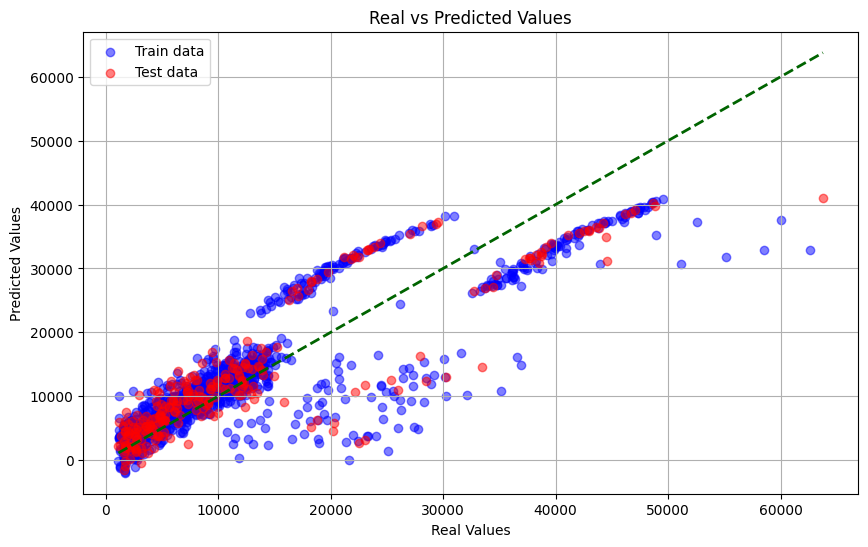

In [15]:
plt.figure(figsize=(10, 6))

# Ploteando datos de entrenamiento
plt.scatter(y_train, y_train_pred, color='blue', label='Train data', alpha=0.5)

# Ploteando datos de prueba
plt.scatter(y_test, y_test_pred, color='red', label='Test data', alpha=0.5)

# Línea ideal
plt.plot([min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())], 
         [min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())], 
         color='darkgreen', linestyle='--', linewidth=2)

plt.title('Real vs Predicted Values')
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid(True)
plt.show()